In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [191]:
import datetime as dt

from data_constructor import DataConstructor
from modules.data_iterator import DataIterator
from modules.data_visualizer import DataVisualizer
from modules.component_manager import ComponentManager
from modules.models import TimePeriod, Metric, ComponentParams

## PCA windowing quirks

When processing windows of data with PCA the output can be "flipped". It means that the factors and weights are flipped on the x axis compared to the previous window.

Although it seems like there is some pattern to the flipping of factors and weights since they don't flip only once but PCA continues to produce flipped results untill it flips back at some point. A direct reason for the flip has not been found yet, however teoretically PCA can produce two kinds of results and both of them can be valid. Example: 
2 * 5 = -2 * -5

In [271]:
file_dir = 'data/components_step15_window1week_2022-01-01_2023-01-01'
manager = ComponentManager(file_dir)

In [105]:
# Originaly 01.10 -> 01.11 has flipped and unordered factors

dt_from = dt.datetime(2022, 1, 10)
dt_to = dt.datetime(2022, 1, 11)

idx_from = manager.get_component_idx_by_timestamp(dt_from)
idx_to = manager.get_component_idx_by_timestamp(dt_to)

In [121]:
components = manager.get_item_list(idx_from, idx_to + 1, idx_step=4)

Constructing graphs: 100%|██████████| 25/25 [00:02<00:00,  8.47it/s]


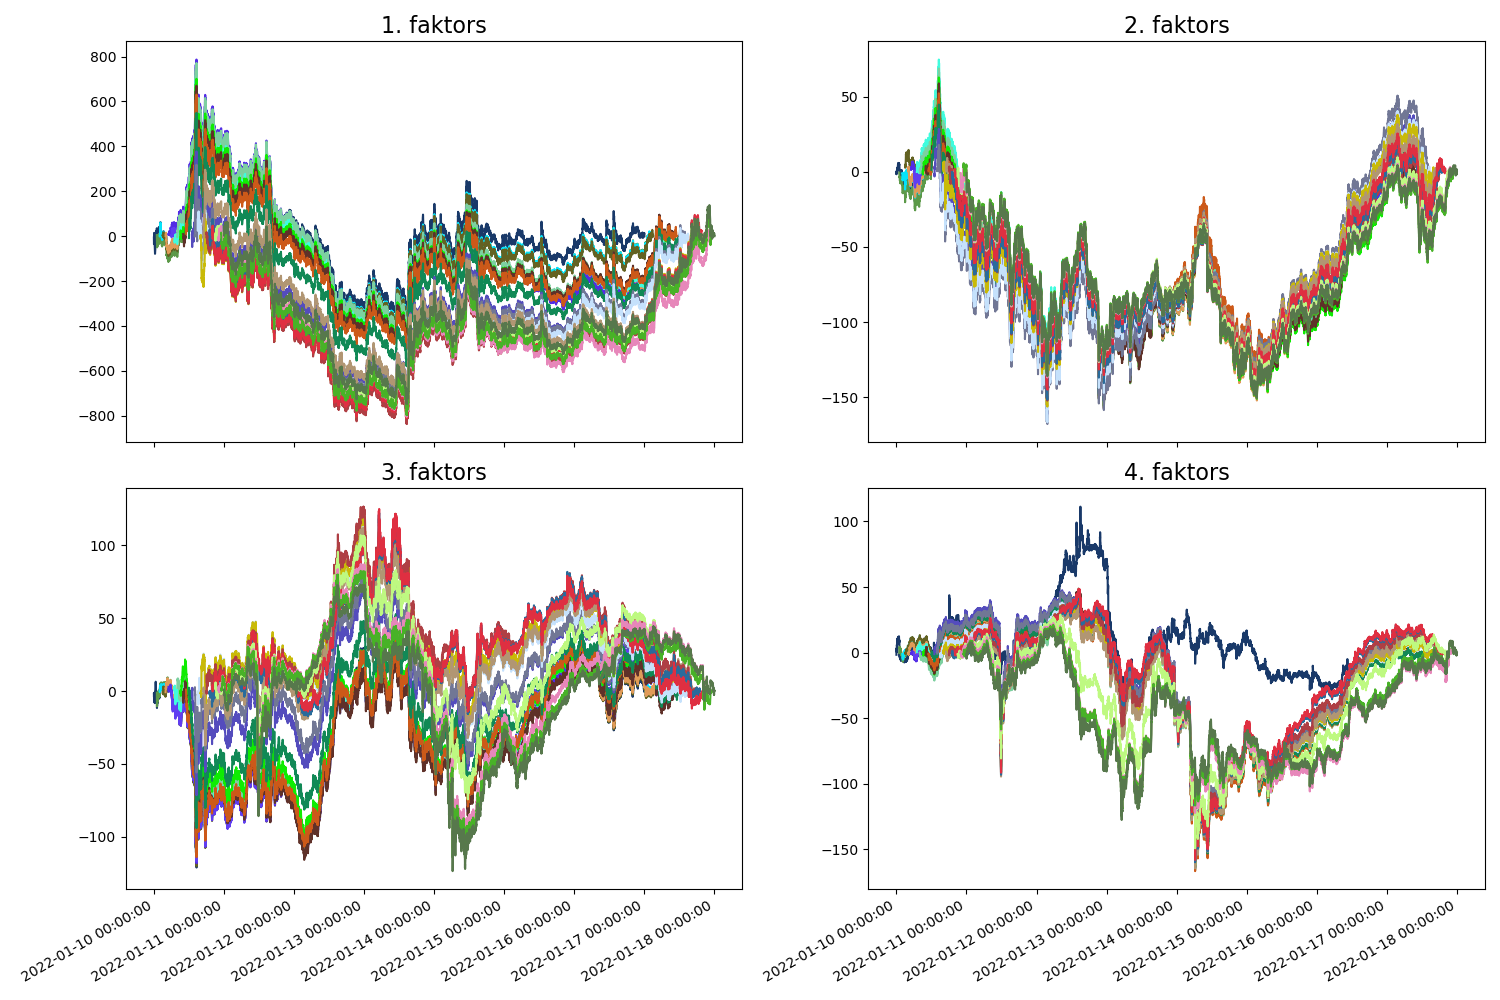

In [107]:
# TODO find date with flipped factors

DataVisualizer.plot_pca_factor_windows(components, manager.date_format, integrate=True)

Constructing graph: 100%|██████████| 10/10 [00:00<00:00, 714.76it/s]


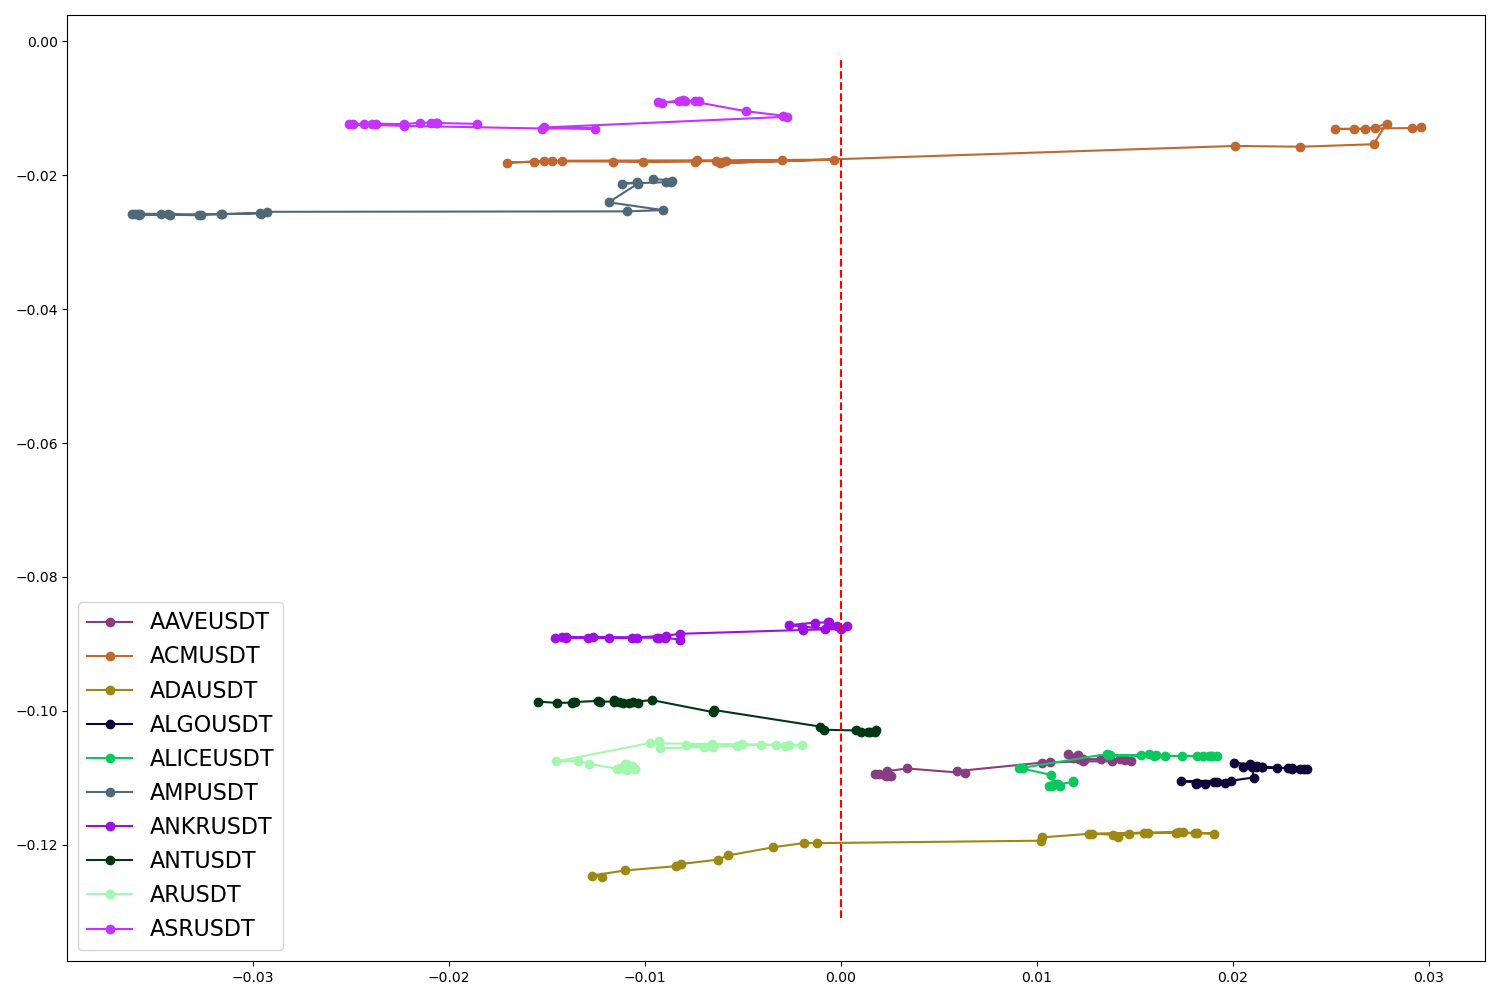

In [108]:
DataVisualizer.plot_pca_weight_windows(components, tickers=manager.tickers, plot_mid_line=True)

Besides the visually obvious factor and weight flips there is another issue that can occur. Since PCA returns factors ordered by their dispersion, in windows over time factors can change their possition in the return list.

However, both of these problems can be fixed using correlation. Same plots but corrected using correlation:

In [109]:
components_ord = manager.get_item_list(idx_from, idx_to + 1, idx_step=4, order_components=True)

Constructing graphs: 100%|██████████| 25/25 [00:03<00:00,  8.03it/s]


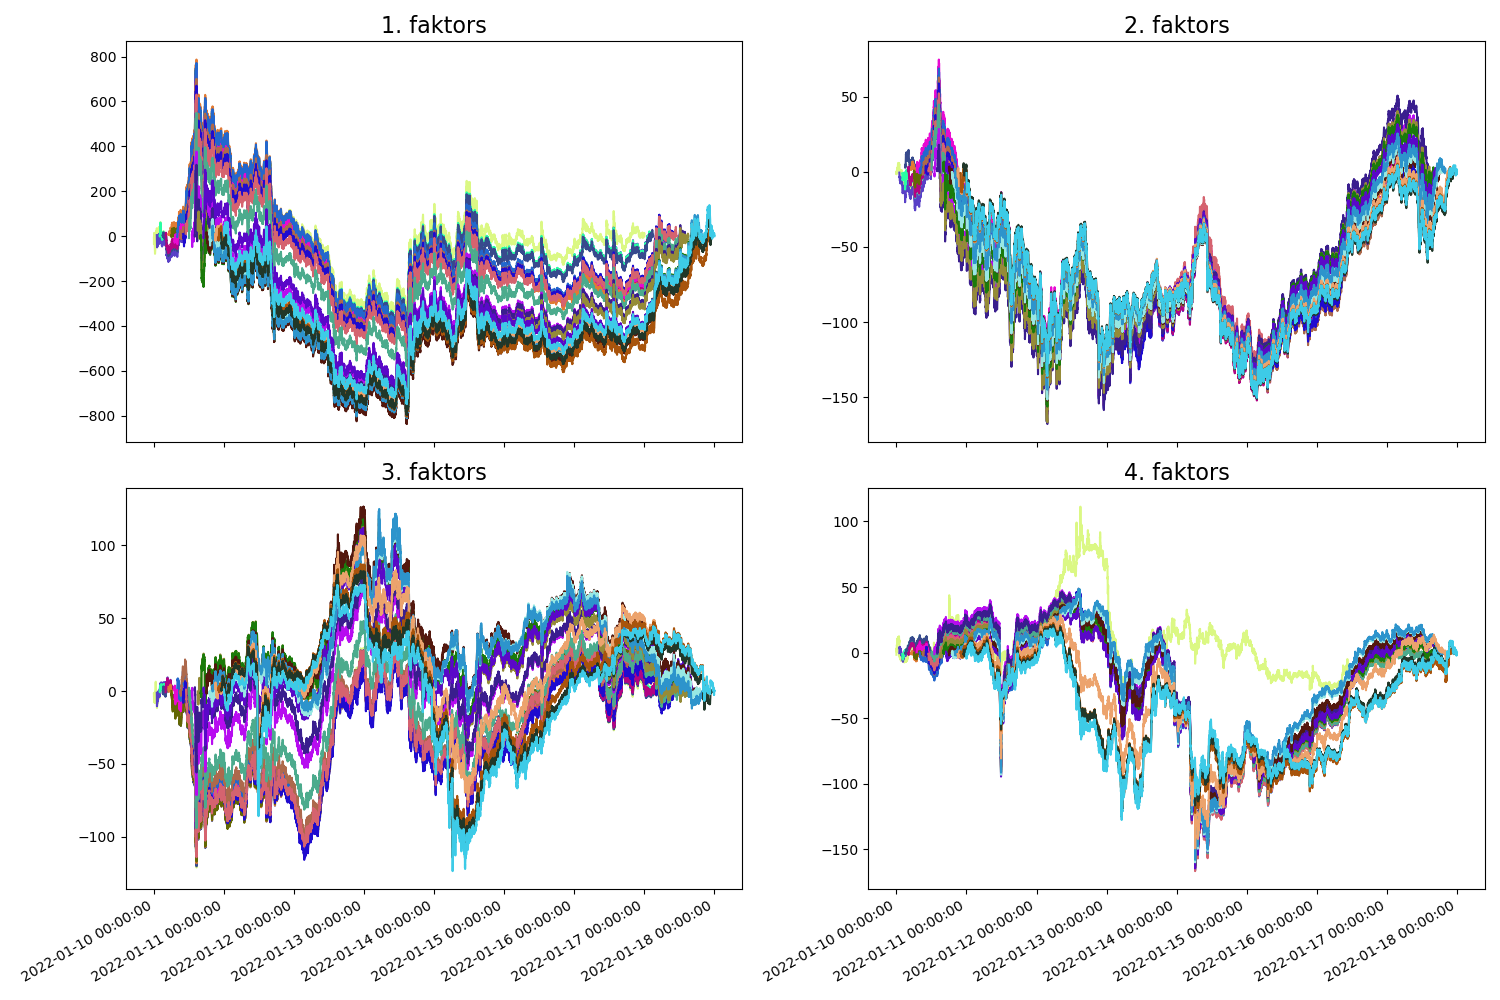

In [110]:
DataVisualizer.plot_pca_factor_windows(components_ord, manager.date_format, integrate=True)

Constructing graph: 100%|██████████| 10/10 [00:00<00:00, 614.08it/s]


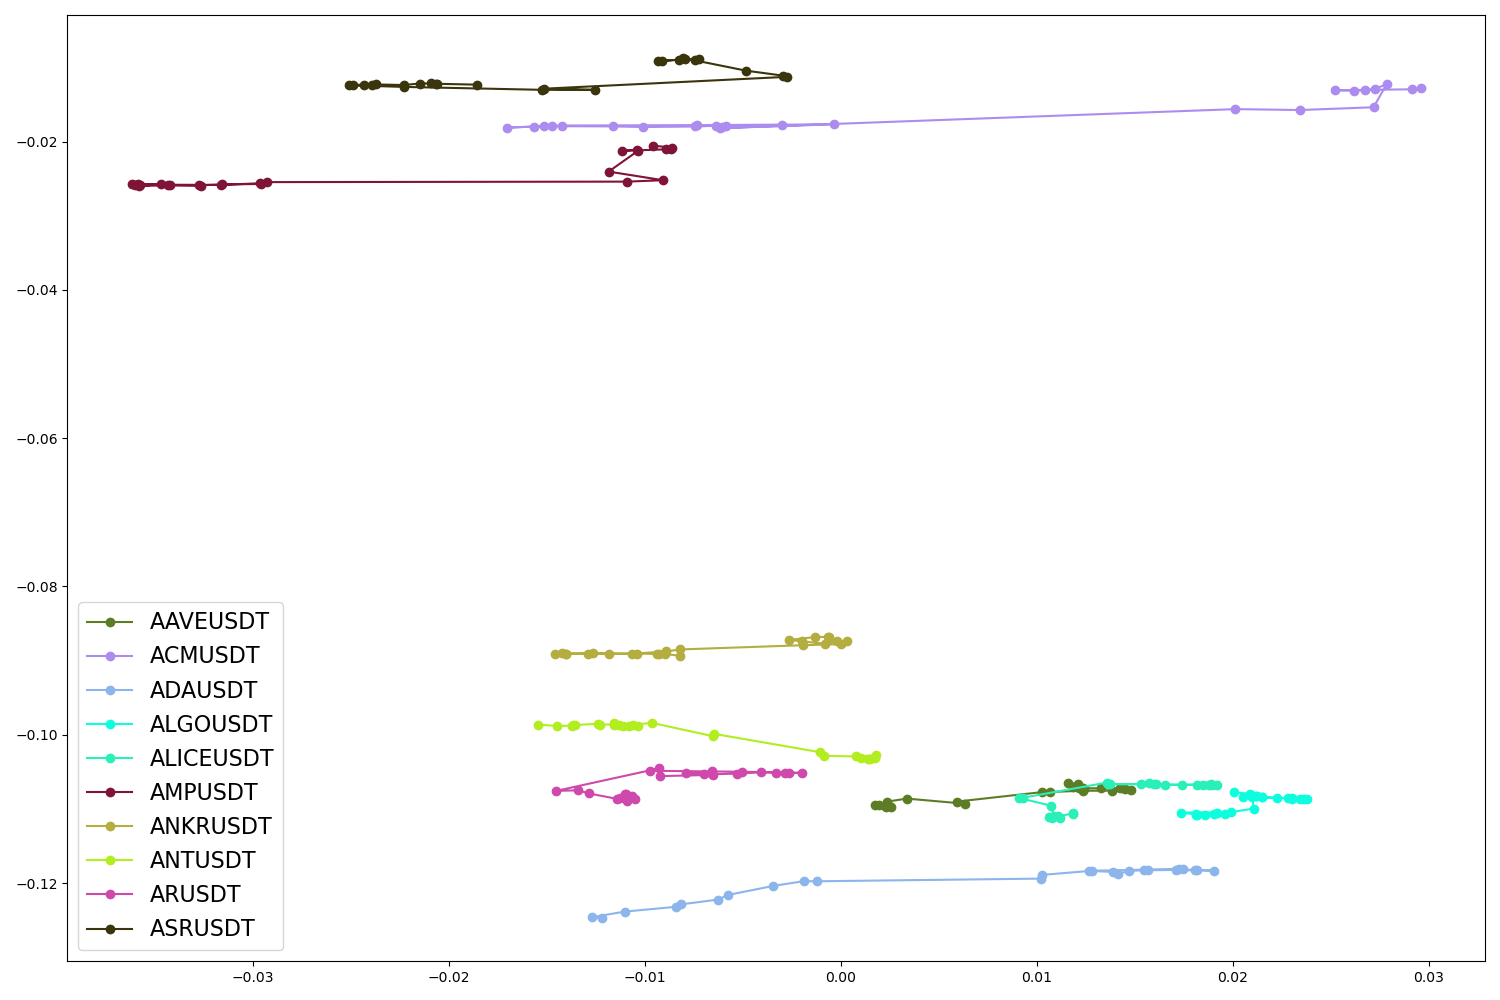

In [111]:
DataVisualizer.plot_pca_weight_windows(components, tickers=manager.tickers)

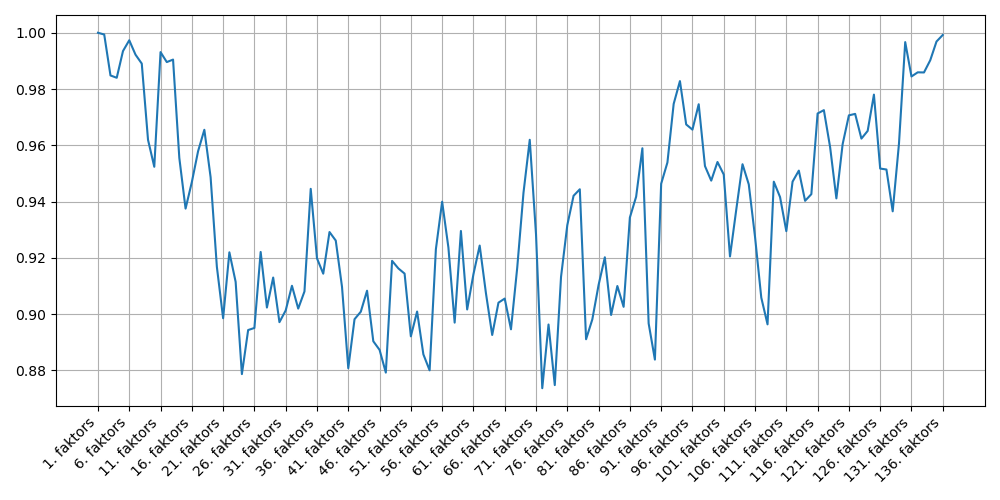

In [39]:
avg_correlation = orderer.calc_correlation_metric()
DataVisualizer.plot_average_correlation(avg_correlation)

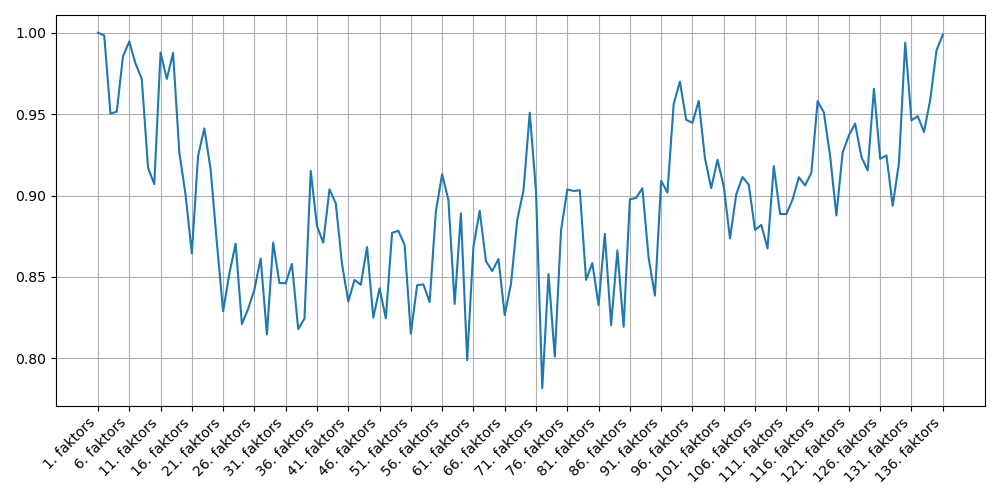

In [43]:
avg_correlation = orderer.calc_correlation_metric(metric=Metric.IRMS)
DataVisualizer.plot_average_correlation(avg_correlation)

### Note

When previously PCA windows were explored there were these quick horizontal movements in the weights which seemed rather natural, however it seems like the cause for this was the 2nd factor switching spots with some other factor. The factor switch is not instantaneous so the model is not able to respond to such a change.

In [143]:
dt_from = dt.datetime.strptime("2022-03-01 17:01:00", '%Y-%m-%d %H:%M:%S')
dt_to = dt.datetime.strptime("2022-03-01 21:01:00", '%Y-%m-%d %H:%M:%S')

idx_from_issue = manager.get_component_idx_by_timestamp(dt_from)
idx_to_issue = manager.get_component_idx_by_timestamp(dt_to)

In [144]:
components_issue = manager.get_item_list(idx_from_issue, idx_to_issue + 1, idx_step=4, order_components=False)

Constructing graphs: 100%|██████████| 5/5 [00:00<00:00,  8.53it/s]


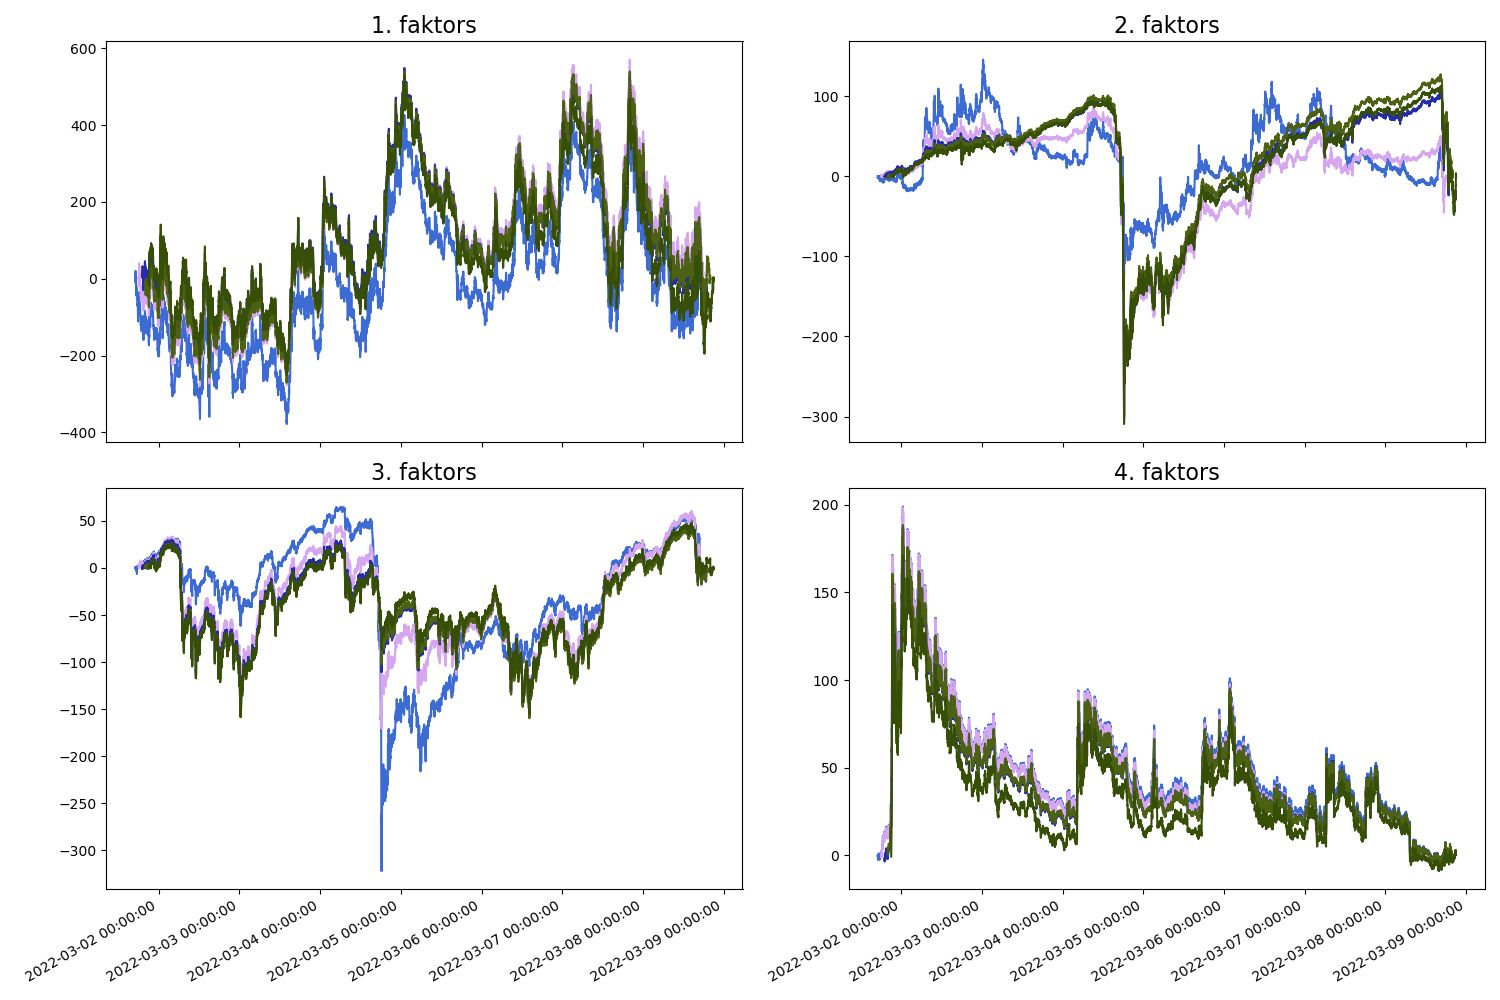

In [145]:
DataVisualizer.plot_pca_factor_windows(components_issue, manager.date_format, integrate=True)

Constructing graph: 100%|██████████| 10/10 [00:00<00:00, 655.66it/s]


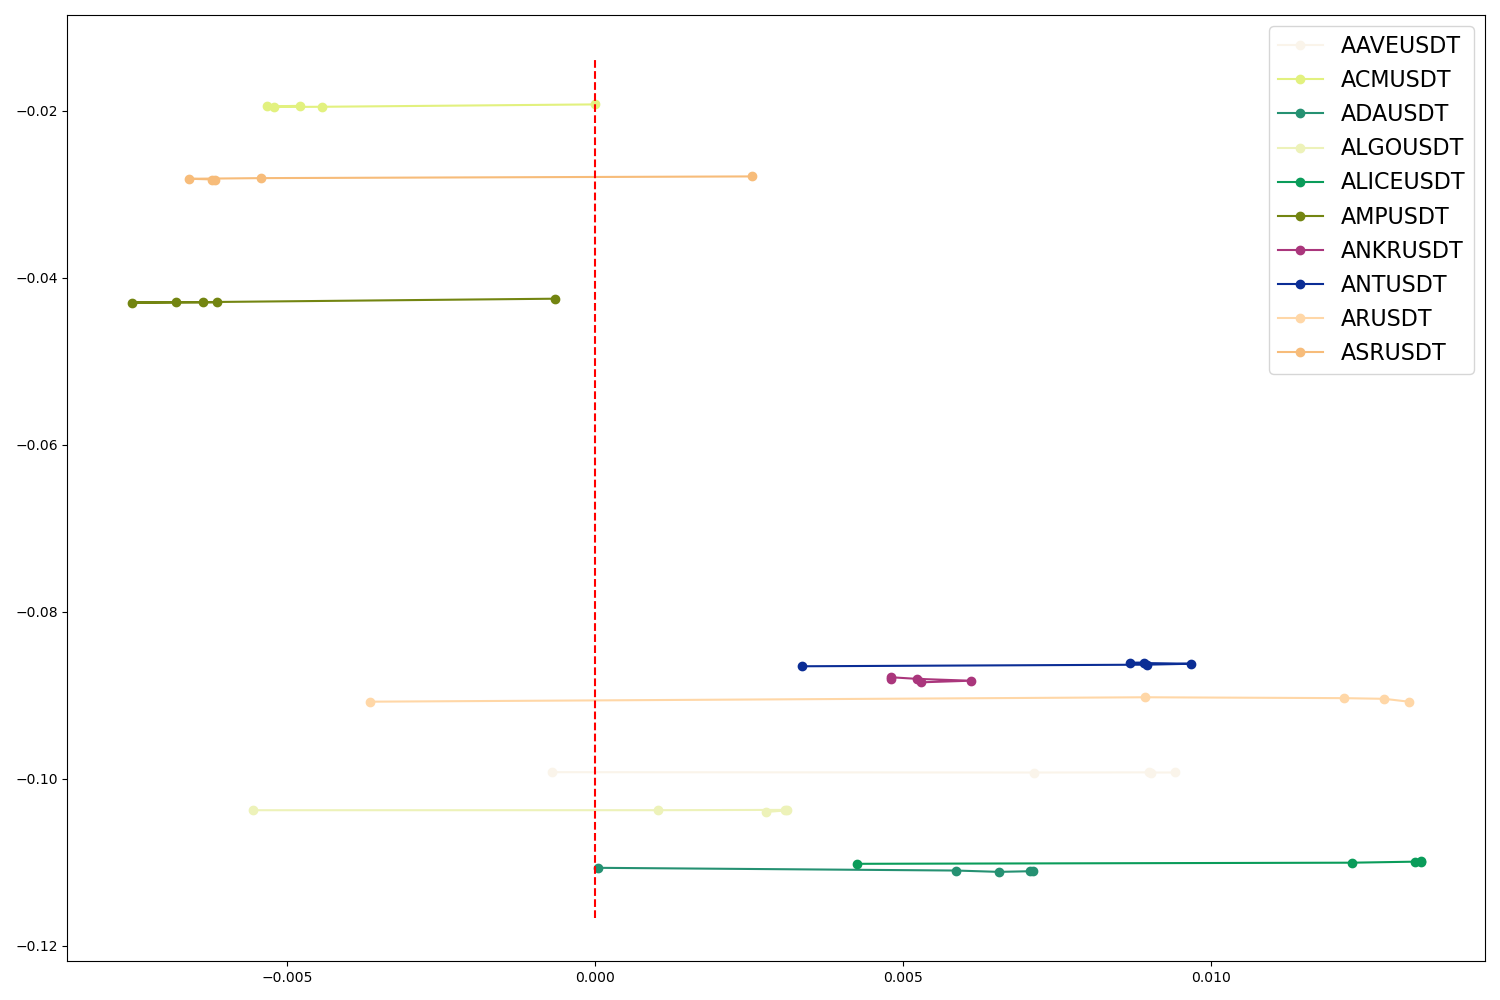

In [146]:
DataVisualizer.plot_pca_weight_windows(components_issue, tickers=manager.tickers, plot_mid_line=True)

In [209]:
dt_from = dt.datetime.strptime("2022-01-01 1:01:00", '%Y-%m-%d %H:%M:%S')
dt_to_comp = dt.datetime.strptime("2022-01-28 1:01:00", '%Y-%m-%d %H:%M:%S')
dt_to_df = dt.datetime.strptime("2022-02-04 1:01:00", '%Y-%m-%d %H:%M:%S')

idx_from_anim = manager.get_component_idx_by_timestamp(dt_from)
idx_to_anim = manager.get_component_idx_by_timestamp(dt_to_comp)

In [210]:
time_period = TimePeriod(dt_from=dt_from, dt_to=dt_to_df)
df_anim, tickers_anim = dc.construct_df(time_period)

Constructing dataframe: 100%|██████████| 169/169 [00:31<00:00,  5.33it/s]


=== Log ===
=== Diff ===
=== Std normalization ===
=== Ordering tickers ===


In [276]:
components_anim = manager.get_item_list(idx_from_anim, idx_to_anim + 1, idx_step=4 * 24, order_components=True)

Constructing graphs: 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


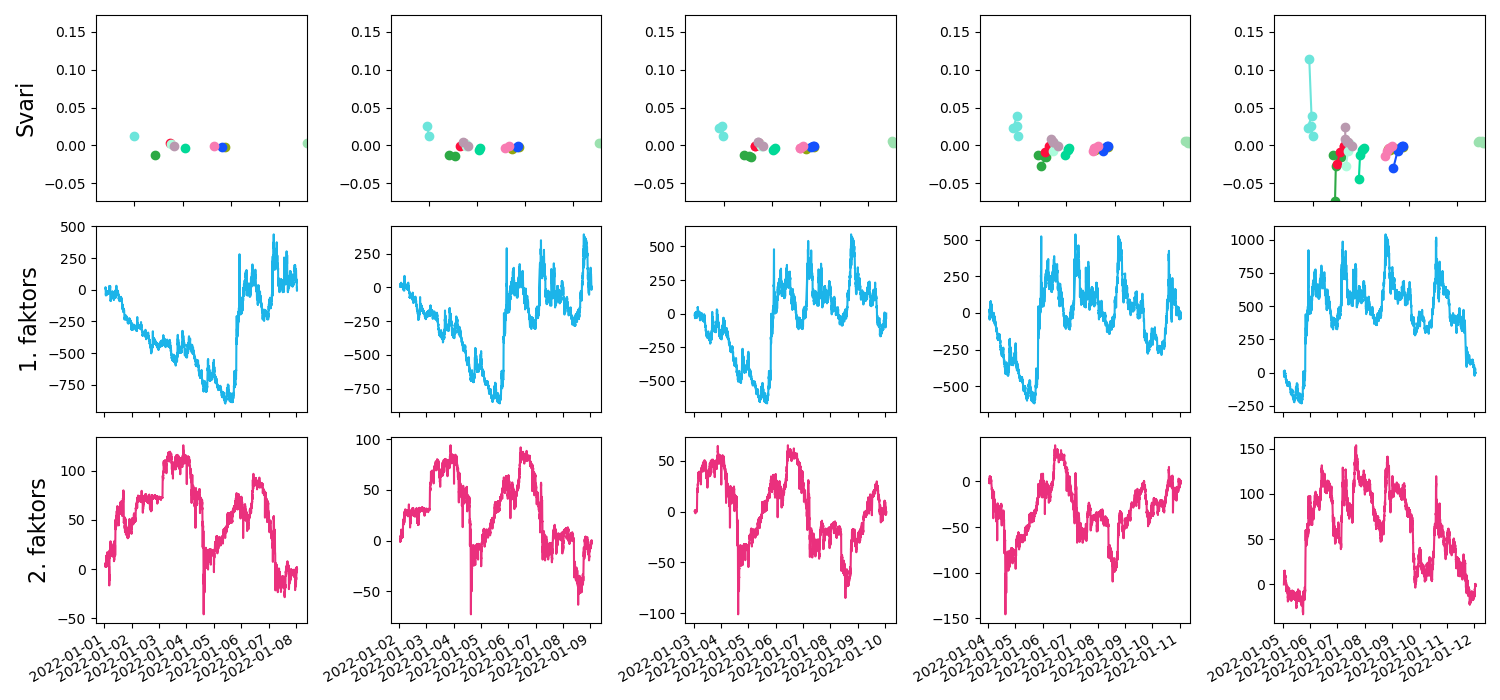

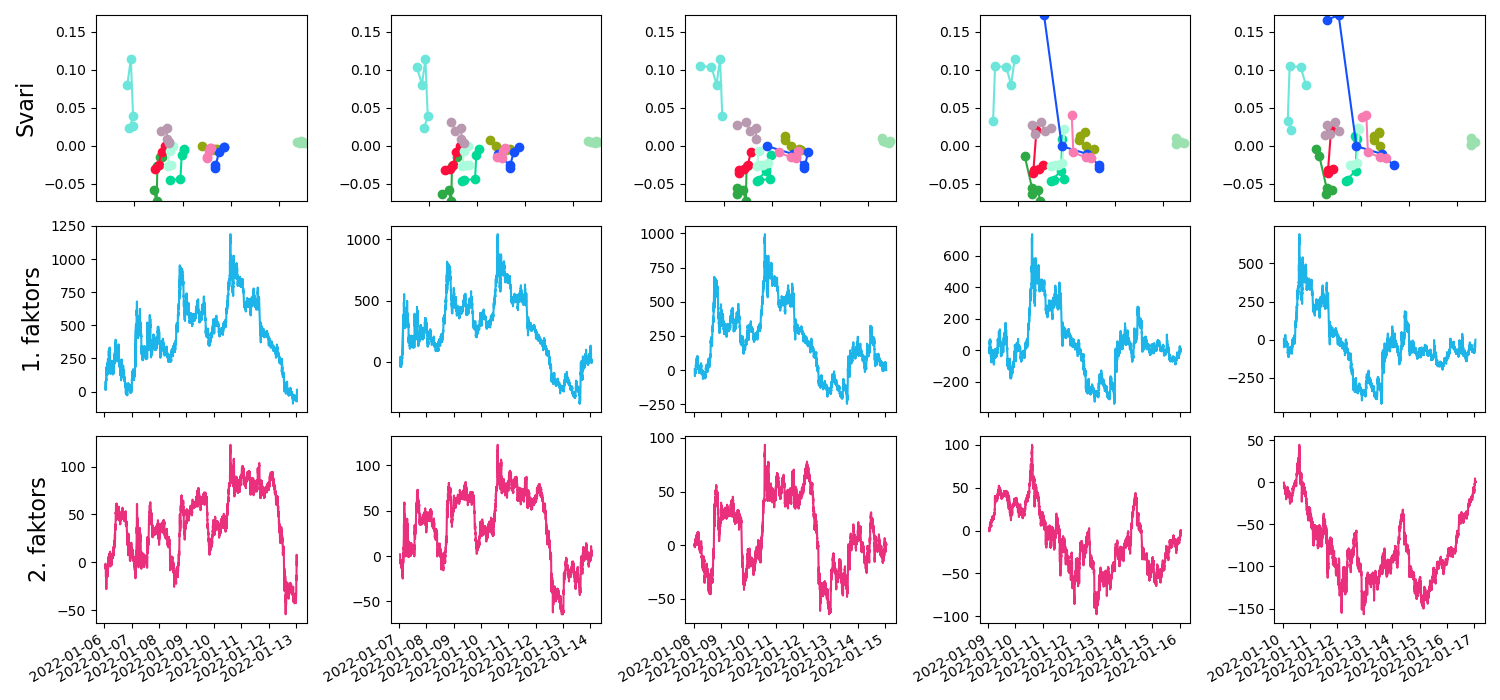

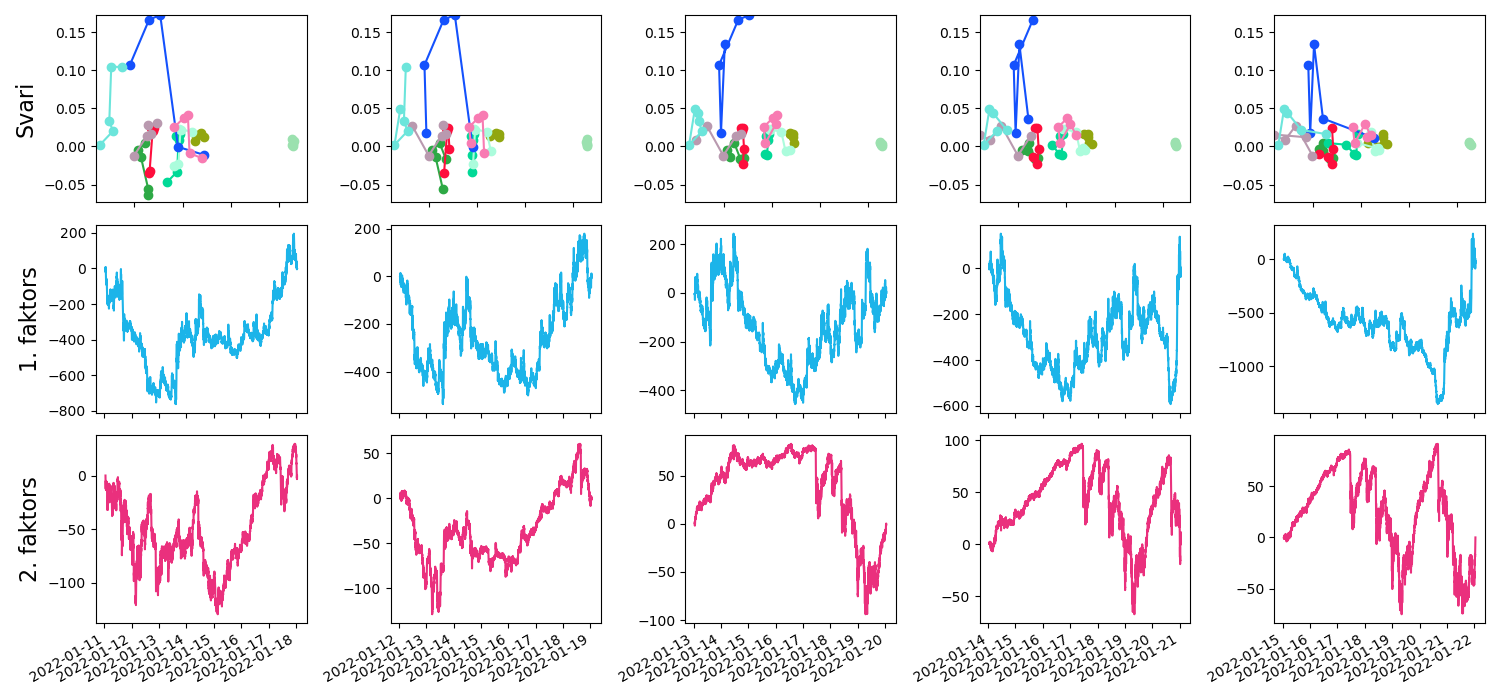

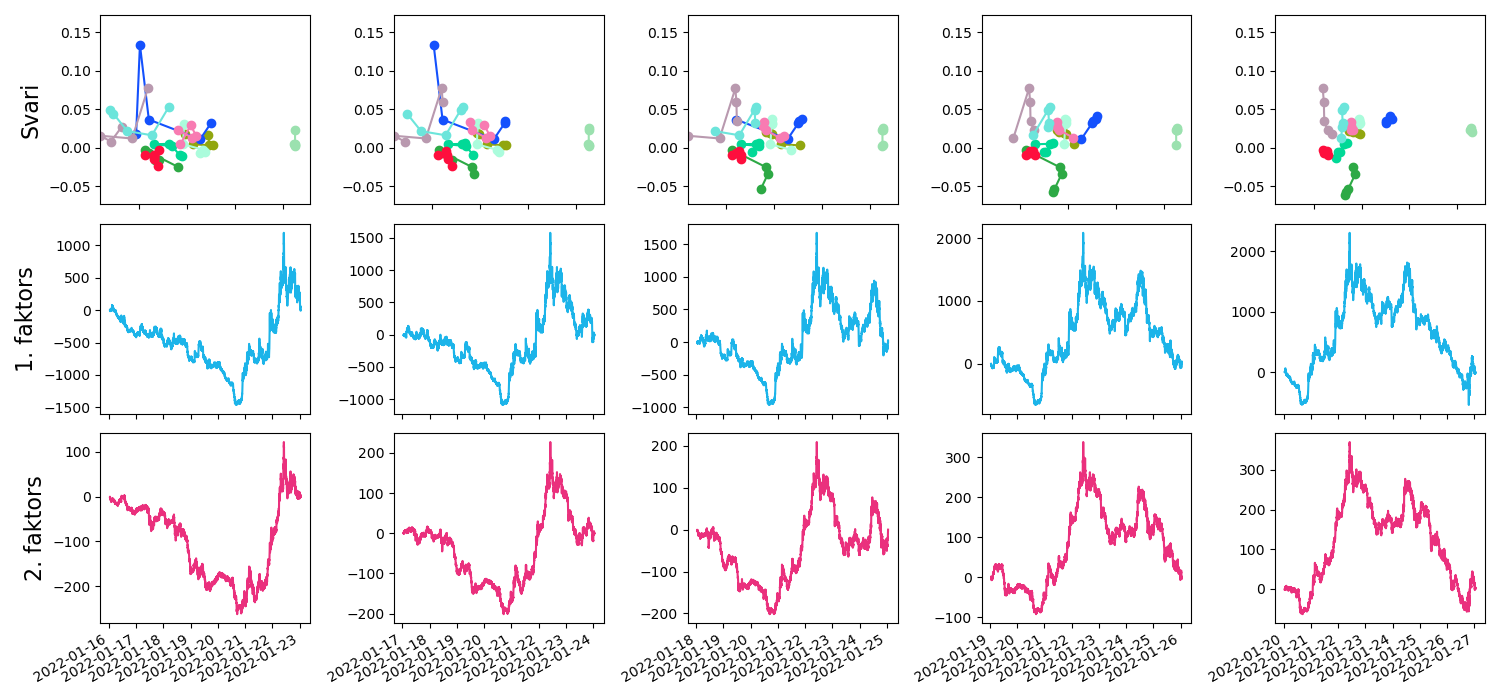

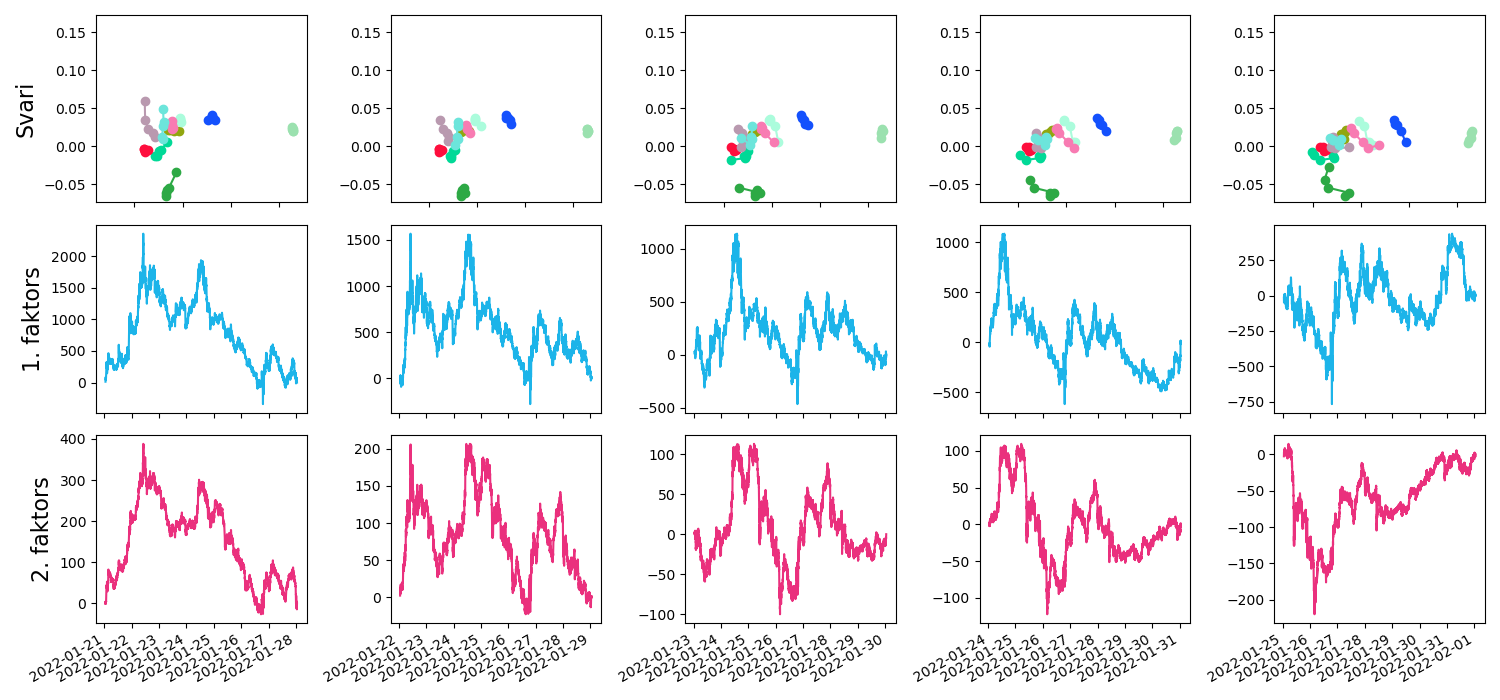

In [337]:
df_iter = DataIterator(df_anim, reading_step=60 * 24)

tickers_to_plot = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'SOLUSDT', 'XRPUSDT', 'LUNAUSDT', 'DOGEUSDT', 'SHIBUSDT', 'ADAUSDT', 'FTMUSDT']
DataVisualizer.plot_factors_weights_over_time(components_anim, df_iter, manager.tickers, tickers_to_plot)